# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient # pip install newsapi-python 

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/andrebacellardemiranda/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv('news.env')
# YOUR CODE HERE!
key = os.getenv('news_api')

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=key)

In [4]:
# Fetch the Bitcoin news articles
Bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
)
Bitcoin_headlines["articles"][0]

{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'https://www.engadget.com/about/editors/richard-lawler',
 'title': "Tesla 'suspends' Bitcoin car purchases citing environmental impact",
 'description': "You can't buy a Tesla with Bitcoin anymore..",
 'url': 'https://www.engadget.com/elon-musk-bitcoin-221708146.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-05/a0f90c30-b36f-11eb-aff6-04fb28cf2f4b',
 'publishedAt': '2021-05-12T22:17:08Z',
 'content': 'Just weeks after Tesla started accepting Bitcoin as currency for cars, Elon Musk revealed in a tweet that it will "suspend" the effort. According to the release (Tesla does not appear to have a funct… [+768 chars]'}

In [5]:
# Fetch the Ethereum news articles
Ethereum_headlines = newsapi.get_everything(
    q="ethereum",
)
Ethereum_headlines["articles"][0]

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Manish Singh',
 'title': 'Vitalik Buterin donates $1 billion worth of ‘meme coins’ to India Covid Relief Fund',
 'description': 'Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and “meme coins” worth $1.5 billion in one of the largest-ever individual philanthropy efforts. Buterin transferred 500 ETH and over 50 trillion SHIB (Shiba Inu), a meme coin, worth aroun…',
 'url': 'http://techcrunch.com/2021/05/12/vitalik-buterin-donates-1-billion-worth-of-meme-coins-to-india-covid-relief-fund/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2017/09/vitalik-buterin-147a2566.jpg?w=600',
 'publishedAt': '2021-05-12T22:46:10Z',
 'content': 'Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and meme coins worth $1.5 billion in one of the largest-ever individual philanthropy efforts.\r\nButerin transferred 500 ETH and … [+1667 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in Bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10000]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
bitcoin_df.head()

,compound,negative,neutral,positive,text
0,0.3818,0.00,0.929,0.071,Just weeks after Tesla started accepting Bitco...
1,0.8402,0.00,0.718,0.282,El Salvador's President Nayib Bukele has made ...
2,0.4939,0.05,0.816,0.134,Image: Tesla\r\n\n \n\n Tesla has stopped acce...
3,0.1280,0.00,0.957,0.043,El Salvador has become the first country in th...
4,0.0000,0.00,1.000,0.000,Illustration by Alex Castro / The Verge\r\n\n ...


In [7]:
# Create the Ethereum sentiment scores DataFrame
# Create the Bitcoin sentiment scores DataFrame
ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10000]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)
ethereum_df.head()

,compound,negative,neutral,positive,text
0,0.2263,0.000,0.940,0.060,"Vitalik Buterin, the creator of Ethereum, on W..."
1,0.4019,0.000,0.917,0.083,Solana isn’t known yet outside of the crypto c...
2,-0.2023,0.087,0.847,0.066,"Bitcoin, Ethereum and a host of Altcoins suffe..."
3,0.0000,0.000,0.000,0.000,
4,0.0000,0.000,1.000,0.000,A representation of virtual currency Ethereum ...


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.215170,0.035450,0.884850,0.079700
std,0.446506,0.051366,0.071796,0.071577
min,-0.762700,0.000000,0.718000,0.000000
25%,0.000000,0.000000,0.844000,0.032250
50%,0.306600,0.000000,0.893000,0.070500
75%,0.509775,0.068000,0.929250,0.113750
max,0.840200,0.180000,1.000000,0.282000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.00000,20.00000,20.00000
mean,-0.054525,0.04720,0.86235,0.04045
std,0.365865,0.07812,0.21888,0.04951
min,-0.868900,0.00000,0.00000,0.00000
25%,-0.345300,0.00000,0.83825,0.00000
50%,0.000000,0.00000,0.92600,0.02550
75%,0.208300,0.08175,0.96175,0.06725
max,0.670500,0.28600,1.00000,0.18800


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = stopwords.words('english')

# # Expand the default stopwords list if necessary
sw = sw + [',','…',']','[','.','$','spanish','trasnlation','using','edition',
           'translated','char','image','illustration','article','become','existed']

In [12]:
# Complete the tokenizer function
import string
def tokenizer(text):
    """Tokenizes text."""

    # Remove the punctuation from text
    text = text.translate(str.maketrans('', '', string.punctuation))
   
    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    outputs = [word.lower() for word in lem]
    
    # Remove the stop words
    tokens = [output.lower() for output in outputs if output.lower() not in sw]
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = ""
for i in range(len(bitcoin_df["text"])):
    bitcoin_df["tokens"][i] = tokenizer(bitcoin_df["text"][i])
bitcoin_df.head()

/Users/andrebacellardemiranda/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,compound,negative,neutral,positive,text,tokens
0,0.3818,0.00,0.929,0.071,Just weeks after Tesla started accepting Bitco...,"[week, tesla, started, accepting, bitcoin, cur..."
1,0.8402,0.00,0.718,0.282,El Salvador's President Nayib Bukele has made ...,"[el, salvadors, president, nayib, bukele, ha, ..."
2,0.4939,0.05,0.816,0.134,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,"[tesla, tesla, ha, stopped, accepting, bitcoin..."
3,0.1280,0.00,0.957,0.043,El Salvador has become the first country in th...,"[el, salvador, ha, first, country, world, reco..."
4,0.0000,0.00,1.000,0.000,Illustration by Alex Castro / The Verge\r\n\n ...,"[alex, castro, verge, cryptocurrency, exchange..."


In [14]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ""
for i in range(len(ethereum_df["text"])):
    ethereum_df["tokens"][i] = tokenizer(ethereum_df["text"][i])
ethereum_df.head()

/Users/andrebacellardemiranda/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,compound,negative,neutral,positive,text,tokens
0,0.2263,0.000,0.940,0.060,"Vitalik Buterin, the creator of Ethereum, on W...","[vitalik, buterin, creator, ethereum, wednesda..."
1,0.4019,0.000,0.917,0.083,Solana isn’t known yet outside of the crypto c...,"[solana, ’, known, yet, outside, crypto, commu..."
2,-0.2023,0.087,0.847,0.066,"Bitcoin, Ethereum and a host of Altcoins suffe...","[bitcoin, ethereum, host, altcoins, suffered, ..."
3,0.0000,0.000,0.000,0.000,,[]
4,0.0000,0.000,1.000,0.000,A representation of virtual currency Ethereum ...,"[representation, virtual, currency, ethereum, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk.util import ngrams
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2

In [17]:
# Define preprocess function
def process_text(doc):
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [18]:
def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ''.join(corpus)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common())
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])


In [19]:
bigram_counter(str(bitcoin_df["tokens"])).head(15)

,bigram,count
0,"(accepting, bitcoin)",2
1,"(el, salvador)",2
2,"(elon, musk)",2
3,"(hello, friend)",2
4,"(friend, welcome)",2
5,"(welcome, back)",2
6,"(back, week)",2
7,"(week, review)",2
8,"(review, l)",2
9,"(week, tesla)",1


In [20]:
# Generate the Ethereum N-grams where N=2
bigram_counter(str(ethereum_df["tokens"])).head(15)

,bigram,count
0,"(bitcoin, ethereum)",2
1,"(representation, virtual)",2
2,"(virtual, currency)",2
3,"(wa, ai)",2
4,"(ai, technology)",2
5,"(technology, error)",2
6,"(error, may)",2
7,"(may, exist)",2
8,"(exist, due)",2
9,"(vitalik, buterin)",1


In [21]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
def token_count(tokens, N=10):
    # Combine all articles in corpus into one large string
    big_string = ''.join(tokens)
    tokens = process_text(big_string)
    return Counter(tokens).most_common(N)

In [23]:
# Use token_count to get the top 10 words for Bitcoin
token_count(str(bitcoin_df["tokens"]))


[('bitcoin', 7),
 ('week', 4),
 ('tesla', 4),
 ('ha', 4),
 ('musk', 3),
 ('accepting', 2),
 ('el', 2),
 ('salvador', 2),
 ('cryptocurrency', 2),
 ('elon', 2)]

In [24]:
# Use token_count to get the top 10 words for Ethereum
token_count(str(ethereum_df["tokens"]))

[('ethereum', 5),
 ('bitcoin', 3),
 ('solana', 2),
 ('crypto', 2),
 ('representation', 2),
 ('virtual', 2),
 ('currency', 2),
 ('wa', 2),
 ('ai', 2),
 ('technology', 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

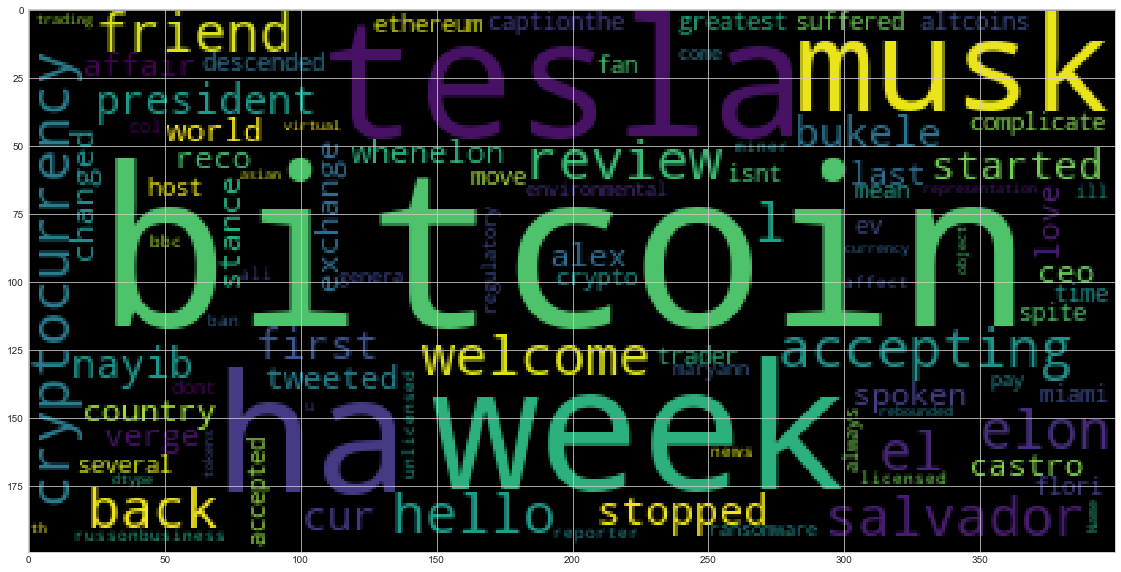

In [26]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(str(bitcoin_df["tokens"]))
plt.imshow(wc)

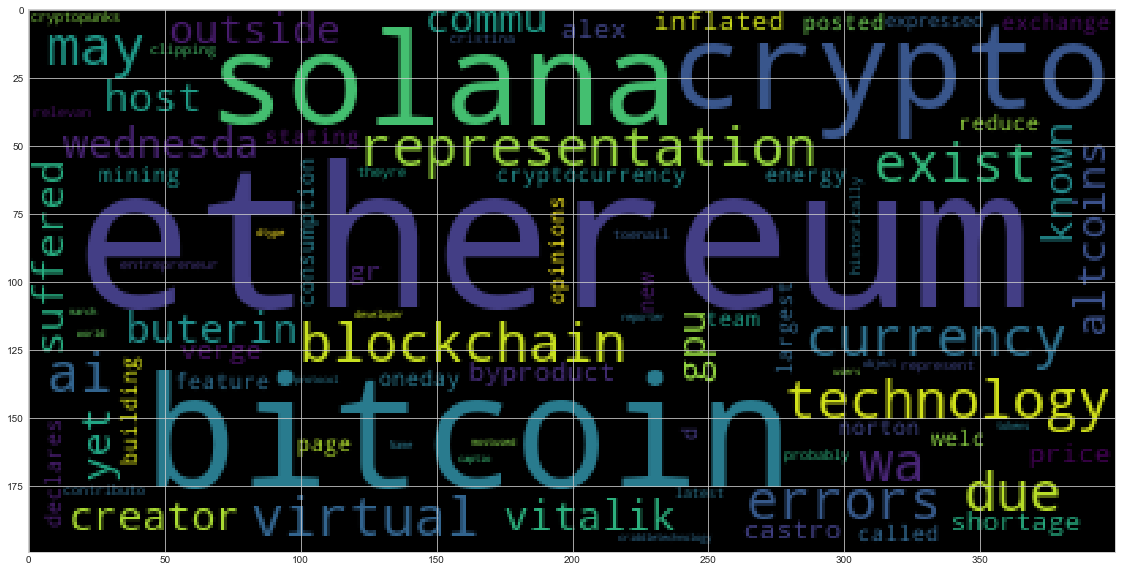

In [27]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(str(ethereum_df["tokens"]))
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [29]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [30]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [31]:
# Concatenate all of the Bitcoin text together
bitcoin_article = ''.join(str(bitcoin_df["text"]))

In [32]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_article)
# Add a title to the document
bitcoin_doc.user_data["title"] = " Bitcoin News API content"

In [33]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [34]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text, ent.label_)

Just weeks DATE
Tesla ORG
Bitco PERSON
El Salvador's GPE
Nayib Bukele PERSON
Tesla ORG
El Salvador GPE
first ORDINAL
Alex Castro PERSON
Last week DATE
Musk PERSON
Elon Musk PERSON
Elon Musk PERSON
Bitcoin PERSON
Bitcoin, Ethereum ORG
Altcoins PERSON
10 CARDINAL
Miami GPE
12 CARDINAL
15 CARDINAL
Mary-Ann RussonBusiness PERSON
BBC News\ ORG
18 CARDINAL
Bitcoin PERSON
19 CARDINAL
Bitcoin ORG
about $50,000 MONEY
Asian NORP


---

### Ethereum NER

In [35]:
# Concatenate all of the Ethereum text together
ethereum_article = ''.join(str(ethereum_df["text"]))

In [36]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_article)

# Add a title to the document
ethereum_doc.user_data["title"] = " Ethereum News API content"
# displacy.serve(ethereum_doc, style="ent")

In [37]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [38]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text, ent.label_)

Vitalik Buterin PERSON
Ethereum ORG
Solana PERSON
Bitcoin, Ethereum ORG
Altcoins PERSON
3 CARDINAL
4 CARDINAL
GPU ORG
Alex Castro PERSON
Spanish LANGUAGE
Norton Cryp WORK_OF_ART
Bitcoin PERSON
Entrepreneur ORG
14 CARDINAL
15 CARDINAL
CryptoPunks ORG
Cristina GPE
17 CARDINAL
Spanish LANGUAGE
March 2020 DATE
19 CARDINAL


---